In [1]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
# import pandas to read dataset 
import pandas as pd
#draw a graph 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
pd.options.mode.chained_assignment = None 

In [2]:
data = pd.read_csv('Dataset1_Cleaned.csv',names=['value'],header=0)
data.head()

,,value
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3650 entries, (0, 1981-01-01) to (3649, 1990-12-31)
Data columns (total 1 columns):
value    3650 non-null float64
dtypes: float64(1)
memory usage: 99.8+ KB


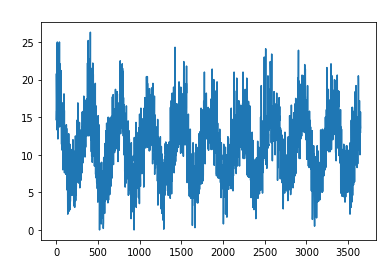

In [4]:
# plotting the points
plt.plot(data.values)
# naming the x axis
plt.xlabel('index of Date in Dataset',color='white')
# naming the y axis
plt.ylabel('Temp',color='white')
# giving a title to my graph
plt.title('Temp Production Jan 1981--Dec 1990',color='white')
# function to show the plot
plt.show()

In [5]:
#split data to 80% train and 20% test  
# train= 3650*80%=2920 column
train = data[:2920]
test = data[2920:]

In [6]:
from pmdarima.arima.utils import ndiffs
#choose the best test model based on min value
## Adf Test
print(ndiffs(data, test='adf'))  
# KPSS test
print(ndiffs(data, test='kpss'))  
# PP test:
print(ndiffs(data, test='pp'))  
#using different test to choose optimal solution 

0
0
0


so we are conclusion the type of test give same value

In [7]:
#The pyramid-arima library for Python allows us to quickly perform this grid search and even creates a model object that you can fit to the training data.
import pmdarima as pm
#create Auto ARIMA Model using pmdarima to get Best model
model = pm.auto_arima(train, start_p=1, start_q=1,  
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=False,   # No Seasonality
                      start_P=0, D=0, d=None,   #One simple approach is to perform a grid search over multiple values of p,d,q,P,D,and Q using some sort of performance criteria
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
#The AIC (stimator of the relative quality of statistical model) value will allow us to compare how well a model fits the data 
print(model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14004.808, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22714.455, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14246.469, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19612.896, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=13588.505, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14158.348, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=13548.961, Time=0.74 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=13961.999, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=13590.061, Time=0.96 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=13550.819, Time=0.92 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=13538.735, Time=2.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13579.109, Time=1.75 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13801.630, Time=0.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=13541.665, Time=2.91 sec
 ARIMA(2,0,0)(0,0,0

models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models.
The resulting best model parameters gave us an AIC value of 13538.735054299057 in 18.568 seconds

In [8]:
# Create  ARIMA Model
model = ARIMA(train, order=(3,0,1))
#fit model
model_ARIMA = model.fit(disp=0)
print(model_ARIMA.summary())

C:\Users\Yousef Khaled\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Yousef Khaled\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 2920
Model:                     ARMA(3, 1)   Log Likelihood               -6763.368
Method:                       css-mle   S.D. of innovations              2.452
Date:                Sun, 12 Sep 2021   AIC                          13538.735
Time:                        13:54:27   BIC                          13574.611
Sample:                             0   HQIC                         13551.657
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.5121      0.942     12.224      0.000       9.666      13.358
ar.L1.value     1.4786      0.021     70.035      0.000       1.437       1.520
ar.L2.value    -0.6110      0.031    -19.647    

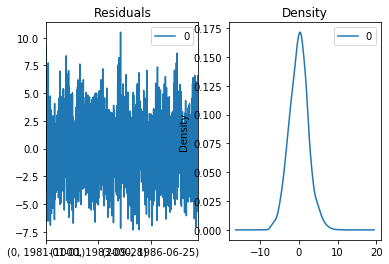

In [9]:

# Plot residual errors
residuals = pd.DataFrame(model_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance

C:\Users\Yousef Khaled\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Yousef Khaled\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<Figure size 1080x360 with 0 Axes>

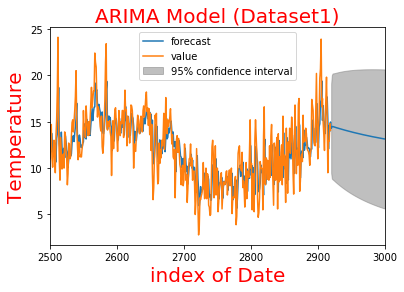

In [10]:
# Actual vs Fitted
plt.figure(figsize=(15,5))
model_ARIMA.plot_predict(start=2500,end=3000,dynamic=False,alpha=0.05)
plt.xlabel("index of Date" ,fontsize=20,color='red')
plt.ylabel("Temperature",fontsize=20,color='red')
plt.title("ARIMA Model (Dataset1)",fontsize=20,color='red')
plt.show()

In [11]:
predict=model_ARIMA.predict(start=len(train),end=len(data)-1)

C:\Users\Yousef Khaled\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [12]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predict))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 4.019
